# Linear Regression

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [71]:
## Get the training data    

In [72]:
dfx = pd.read_csv('linearX.csv')
dfy = pd.read_csv('linearY.csv')

In [73]:
x = dfx.values # to convert to numpy array
y = dfy.values

In [74]:
print(x.shape)
print(y.shape)

(99, 1)
(99, 1)


## Visualize and preprocess

[]

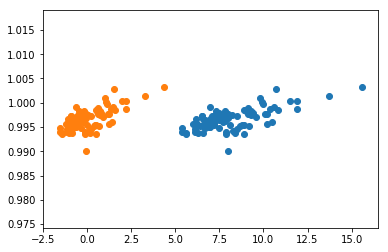

In [75]:
plt.scatter(x,y)
X = (x-x.mean())/x.std()
Y = y
plt.scatter(X,Y)
plt.plot()

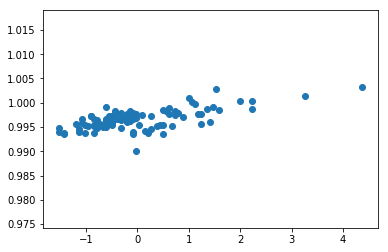

In [76]:
plt.scatter(X,Y)
plt.show()

## Gradient Algorithm
- Start with a random theta
- Repeat until convergence
    - Update theta according to the rule

In [77]:
def hypothesis(x,theta):
    return theta[0] + theta[1]*x

In [78]:
def error(X,Y,theta):
        err = 0
        for i in range(X.shape[0]):
            err+=(Y[i]-hypothesis(X[i],theta))**2
        err/=2
        return err

In [79]:
def gradient(X,Y,theta):
    grad = np.zeros((2,))
    for i in range(X.shape[0]):
        grad[0]+=(hypothesis(X[i],theta)-Y[i])
        grad[1]+=(hypothesis(X[i],theta)-Y[i])*X[i]
    return grad

In [80]:
def gradientDescent(X,Y,learning_rate = 0.001):
    error_list = []
    theta_list = []
    max_itr = 100
    i = 0
#    theta = np.zeros((2,))
    theta = np.array([-2.0,0.0])
    while(i<=max_itr):
        grad = gradient(X,Y,theta)
        theta[0]-=learning_rate*grad[0]
        theta[1]-=learning_rate*grad[1]
        theta_list.append(list(theta))
        error_list.append(error(X,Y,theta))
        i+=1
    return theta,error_list,theta_list

In [81]:
final_theta,error_list,theta_list = gradientDescent(X,Y)
print(final_theta)

[0.996554  0.0013579]


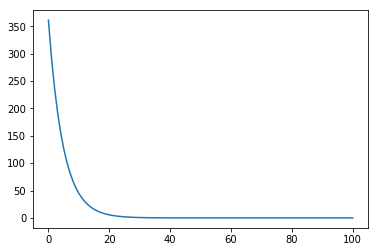

In [82]:
plt.plot(error_list)
plt.show()

In [83]:
print(final_theta)

[0.996554  0.0013579]


## Plot the line for testing data

In [84]:
xtest = np.linspace(-2,6,10)

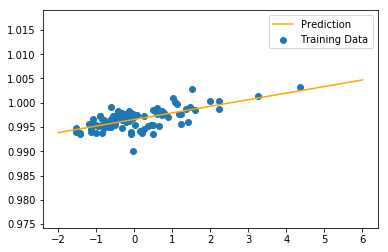

In [85]:
plt.scatter(X,Y,label = 'Training Data')
plt.plot(xtest,hypothesis(xtest,final_theta),color = 'orange',label = 'Prediction')
plt.legend()
plt.show()

In [86]:
final_theta

array([0.996554 , 0.0013579])

## Visualizing Gradient Descent
- Plotting Error Surfaces and contours

In [87]:
T0 = np.arange(-2,3,0.01) # theta0
T1 = np.arange(-2,3,0.01) # theta1

T0,T1 = np.meshgrid(T0,T1)  # a 2D surface of (theta0,theta1) along x and y - axis

J = np.zeros(T0.shape) # Corresponding value of J(theta0,theta1) along z- axis

n = T0.shape[0]
m = T0.shape[1]
for i in range(n):
    for j in range(m):
        J[i,j] = (1/2)*np.sum((T0[i,j]+T1[i,j]*X-Y)**2)
print(J.shape)

(500, 500)


In [88]:
theta_list = np.array(theta_list)

## Plot the 3D loss - J(theta0,theta1)

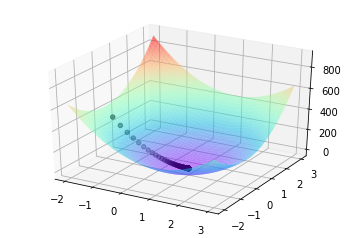

In [89]:
fig = plt.figure()
axes = fig.gca(projection = '3d')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list,c='k')
axes.plot_surface(T0,T1,J,cmap = 'rainbow',alpha = 0.5)
plt.show()

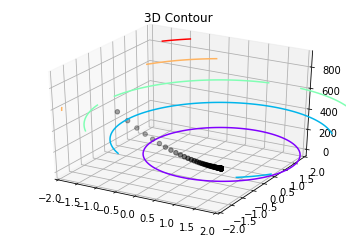

In [90]:
fig = plt.figure()
axes = fig.gca(projection = '3d')
axes.set_xlim([-2,2])
axes.set_ylim([-2,2])
axes.scatter(theta_list[:,0],theta_list[:,1],error_list,c='k')
plt.title('3D Contour')
axes.contour(T0,T1,J,cmap = 'rainbow')
plt.show()

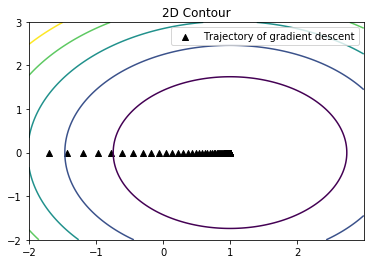

In [91]:
plt.contour(T0,T1,J)
plt.scatter(theta_list[:,0],theta_list[:,1],marker = '^',c = 'k',label = 'Trajectory of gradient descent')
plt.title('2D Contour')
plt.legend()
plt.show()